## Author: **Avikshit Banerjee** 

[Click here to follow me on Linkedin](https://www.linkedin.com/in/avikshit-banerjee/)

<br>


<br>

#**Uber Data Analysis With Python**

**Uber Technologies, Inc.**, commonly known as **Uber**, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will use data regarding **Uber ride**

In this notebook, we shall use Python for the following:

*   Check how long do people travel with Uber?
*   What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?





The dataset for this project has been made availble at my github repository.

You can also request access to your personal Uber [data here](https://myprivacy.uber.com/privacy/exploreyourdata/download)

<br>

##**Import The Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [12]:
data=pd.read_csv('/content/Uber Drives - .csv')
data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [16]:
data['PURPOSE*'].value_counts() #Checking for the frequency of 'Purpose' attributes

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

##Check for Mising Values

Let's check below if there data points missing in our dataset.

In [14]:
data.isnull().any() 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [15]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In this project we mainly conduct a visual data exploration hence we replace all the null values under 'PURPOSE*' with value 'New' as we do not want to lose too much of variance.

NOTE: Dropping a value in your dataset should be the last option to consider.



In [17]:
data['PURPOSE*'].fillna('New', inplace = True)

In [23]:
data=data.dropna()

In [24]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [ ]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [27]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,New
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [33]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,New,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday


##**Categories We Have**

In [29]:
data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

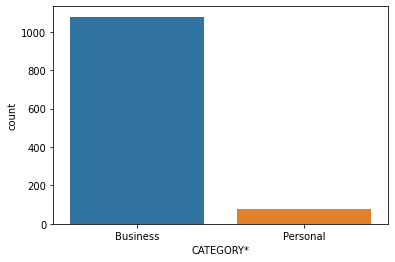

In [30]:
sns.countplot(x='CATEGORY*',data=data)

We have large number of business rides caegory as against very few personal rides.

##**How long do people travel with Uber?**

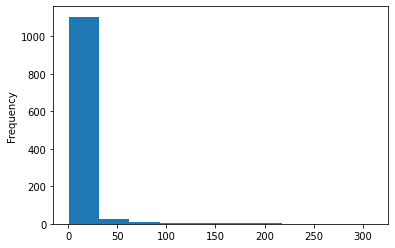

In [31]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber. 

##**What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of trips Vs hours')

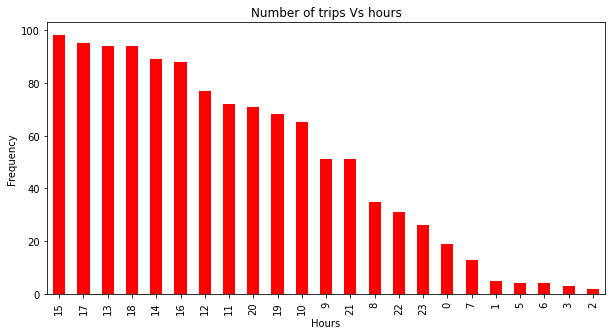

In [39]:
data['HOUR'].value_counts().plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 15th hour(3pm) and the least hour is 2 am.

#**Check The Purpose Of Trips**

Text(0.5, 1.0, 'Number of Trips Vs Purpose of trips')

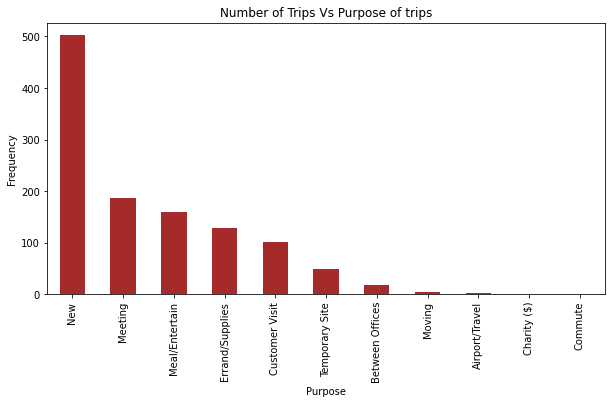

In [47]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Purpose of trips')

We can notice that mostly the purpose of the trip is meeting and meal/entertain. We ignore the 'New' category as that signifies missing columns.

##**Which Day Has The Highest Number Of Trips**

Text(0.5, 1.0, 'Number of Trips Vs Days')

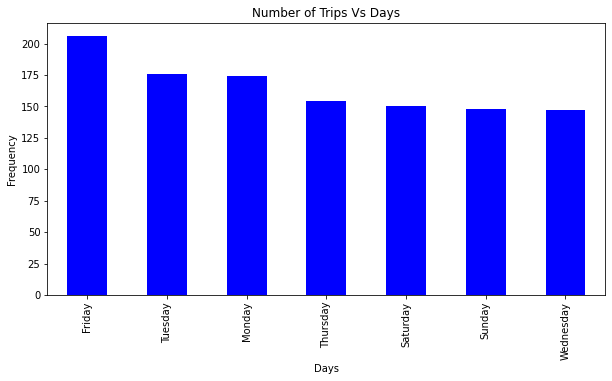

In [46]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Days')

So Friday has the highest number of Trips.

##**What Are The Number Of Trips Per Each Day?**

Text(0.5, 1.0, 'Number of Trips Vs Dates')

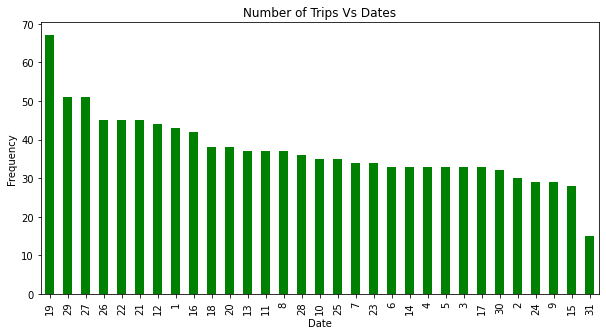

In [45]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Dates')

##**What Are The Trips In The Month**

Text(0.5, 1.0, 'Number of Trips Vs Months')

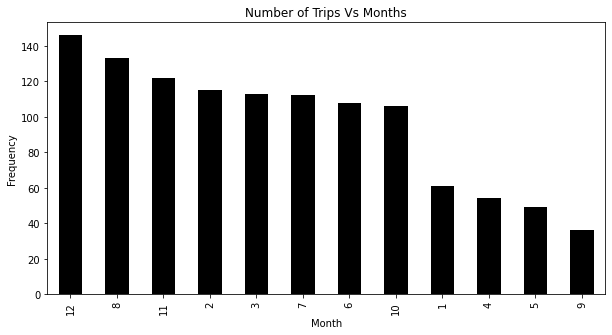

In [48]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Months')

We can see that December(12) has the most trips.

##**The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

Text(0.5, 1.0, 'Number of Trips Vs Pickup locations')

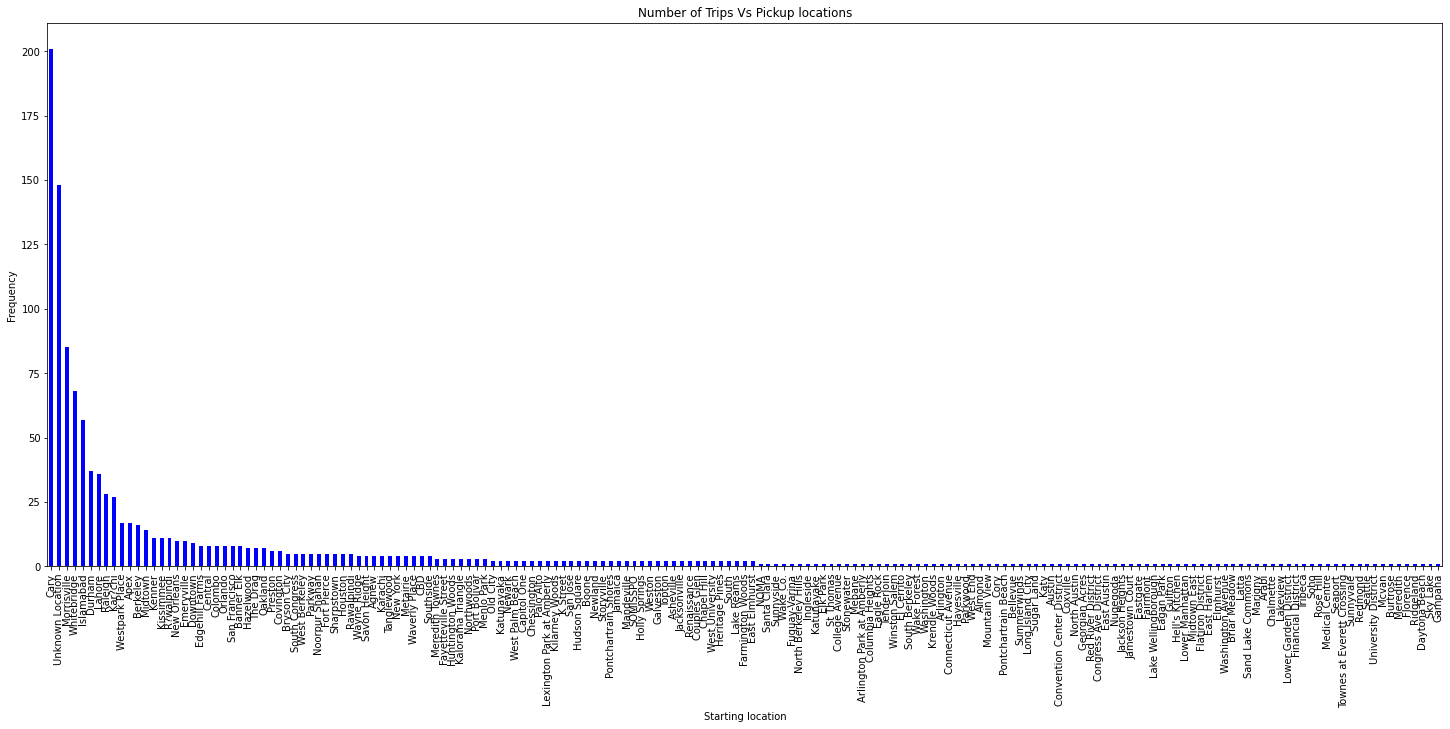

In [49]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')
plt.xlabel('Starting location')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Pickup locations')

Most people in this dataset starts their journey from **Cary** followed by some unknown location and then Morrisville.